One-hot encoded data shape: (7500, 120)


C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


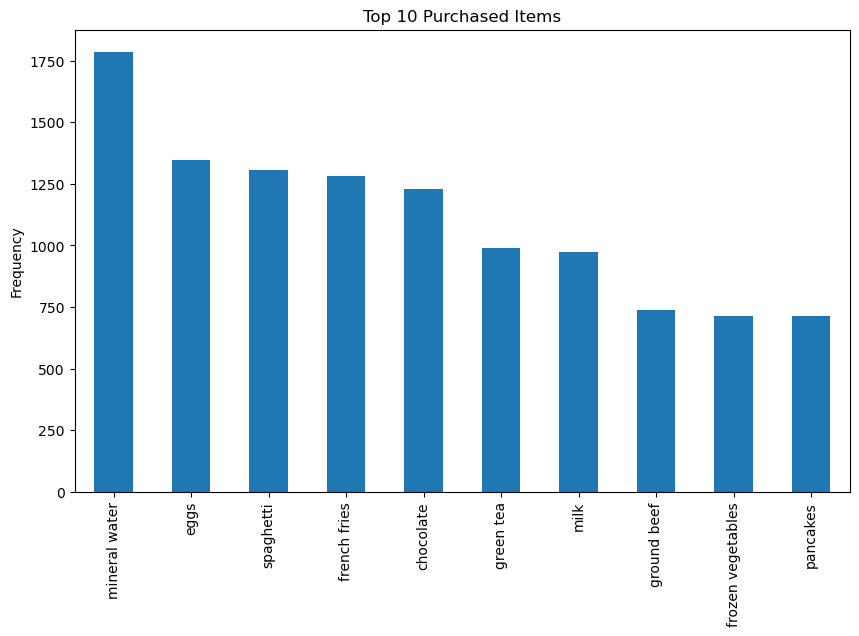

In [1]:
# Load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv(r"C:\Users\Sanchit Dakle\OneDrive\Desktop\Excelar\Online retail.csv", encoding='ISO-8859-1')

# Split each transaction into a list of products
transactions = [transaction.split(',') for transaction in df.iloc[:, 0]]

# One-hot encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the shape of the one-hot encoded DataFrame
print("One-hot encoded data shape:", df_encoded.shape)

# Plotting the most common items in the dataset
item_counts = df_encoded.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', title='Top 10 Purchased Items')
plt.ylabel('Frequency')
plt.show()


Frequent itemsets:
    support          itemsets
0  0.020267         (almonds)
1  0.033200         (avocado)
2  0.010800  (barbecue sauce)
3  0.014267       (black tea)
4  0.011467      (body spray)


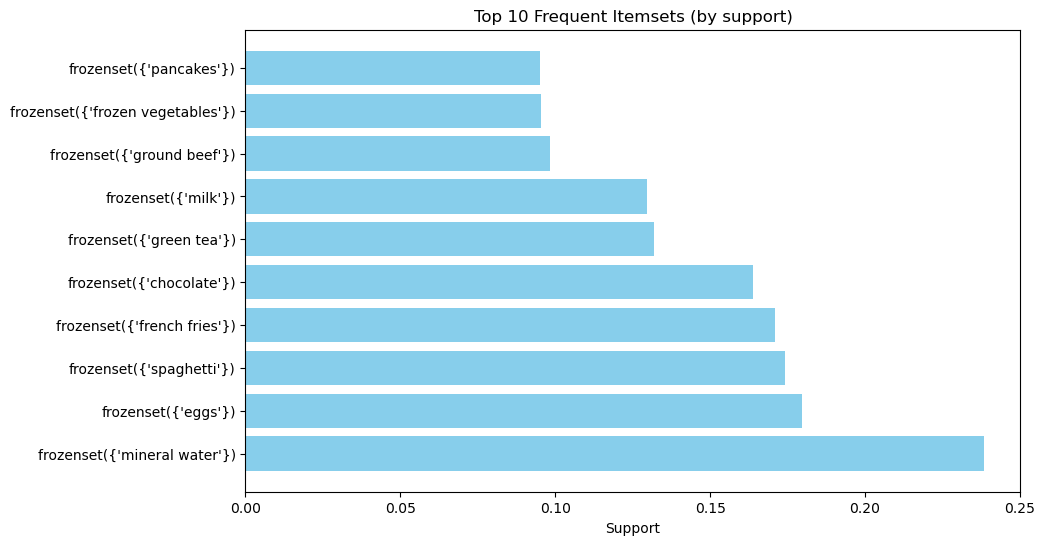

In [2]:
# Applying Apriori to find frequent itemsets
min_support = 0.01  # Adjust support threshold if needed
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Display the first few frequent itemsets
print("Frequent itemsets:")
print(frequent_itemsets.head())

# Plot the top 10 frequent itemsets by support
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
top_frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 1].nlargest(10, 'support')
plt.figure(figsize=(10, 6))
plt.barh([str(i) for i in top_frequent_itemsets['itemsets']], top_frequent_itemsets['support'], color='skyblue')
plt.title('Top 10 Frequent Itemsets (by support)')
plt.xlabel('Support')
plt.show()


Association Rules:
       antecedents      consequents   support  confidence      lift
0        (avocado)  (mineral water)  0.011467    0.345382  1.449559
1  (mineral water)        (avocado)  0.011467    0.048125  1.449559
2        (burgers)           (cake)  0.011467    0.131498  1.622103
3           (cake)        (burgers)  0.011467    0.141447  1.622103
4        (burgers)      (chocolate)  0.017067    0.195719  1.194377


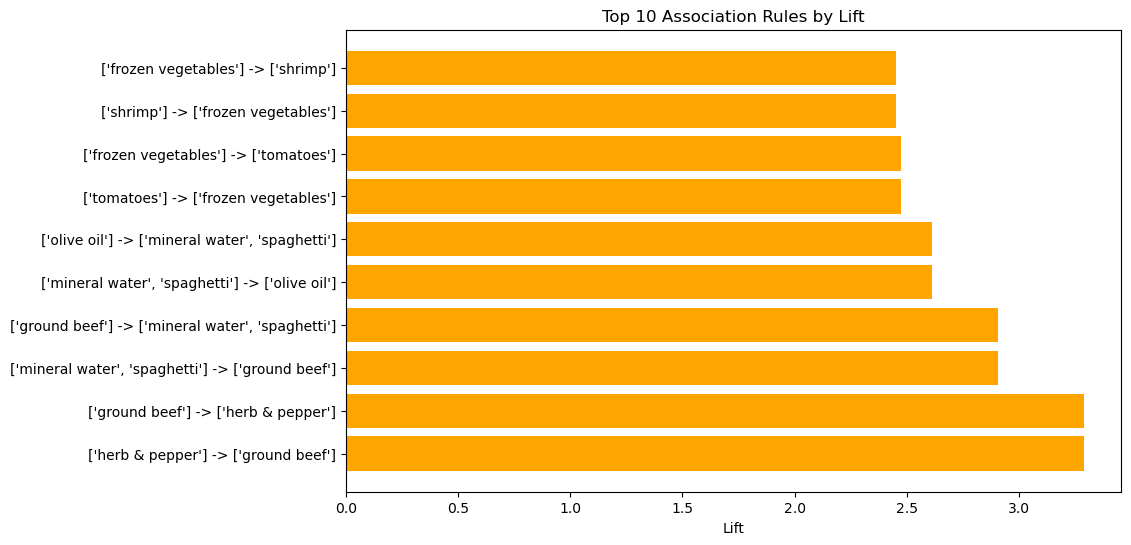

In [3]:
# Generate association rules with a minimum lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few rules
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Visualize the top 10 rules by lift
top_rules = rules.nlargest(10, 'lift')
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_rules['lift'], color='orange')
plt.yticks(range(10), [f"{list(a)} -> {list(c)}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.show()


Association Rules:
       antecedents      consequents   support  confidence      lift
0        (avocado)  (mineral water)  0.011467    0.345382  1.449559
1  (mineral water)        (avocado)  0.011467    0.048125  1.449559
2        (burgers)           (cake)  0.011467    0.131498  1.622103
3           (cake)        (burgers)  0.011467    0.141447  1.622103
4        (burgers)      (chocolate)  0.017067    0.195719  1.194377


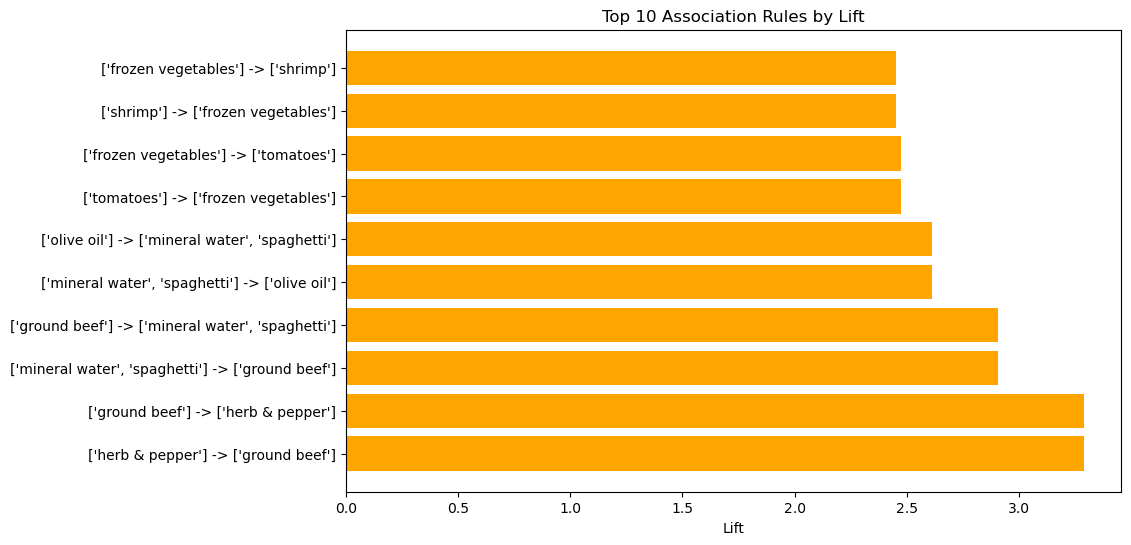

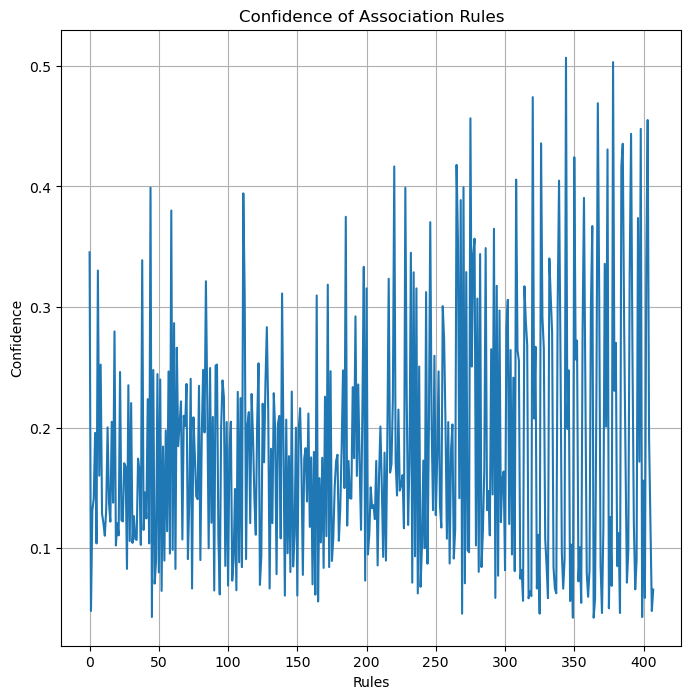

In [4]:
# Generate association rules with a minimum lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few rules
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Visualize the top 10 rules by lift
top_rules = rules.nlargest(10, 'lift')
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_rules['lift'], color='orange')
plt.yticks(range(10), [f"{list(a)} -> {list(c)}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.show()

# Plot confidence of all rules
rules['confidence'].plot(figsize=(8, 8), grid=True)
plt.ylabel('Confidence')
plt.xlabel('Rules')
plt.title('Confidence of Association Rules')
plt.show()


Association Rules:
       antecedents      consequents   support  confidence      lift
0        (avocado)  (mineral water)  0.011467    0.345382  1.449559
1  (mineral water)        (avocado)  0.011467    0.048125  1.449559
2        (burgers)           (cake)  0.011467    0.131498  1.622103
3           (cake)        (burgers)  0.011467    0.141447  1.622103
4        (burgers)      (chocolate)  0.017067    0.195719  1.194377


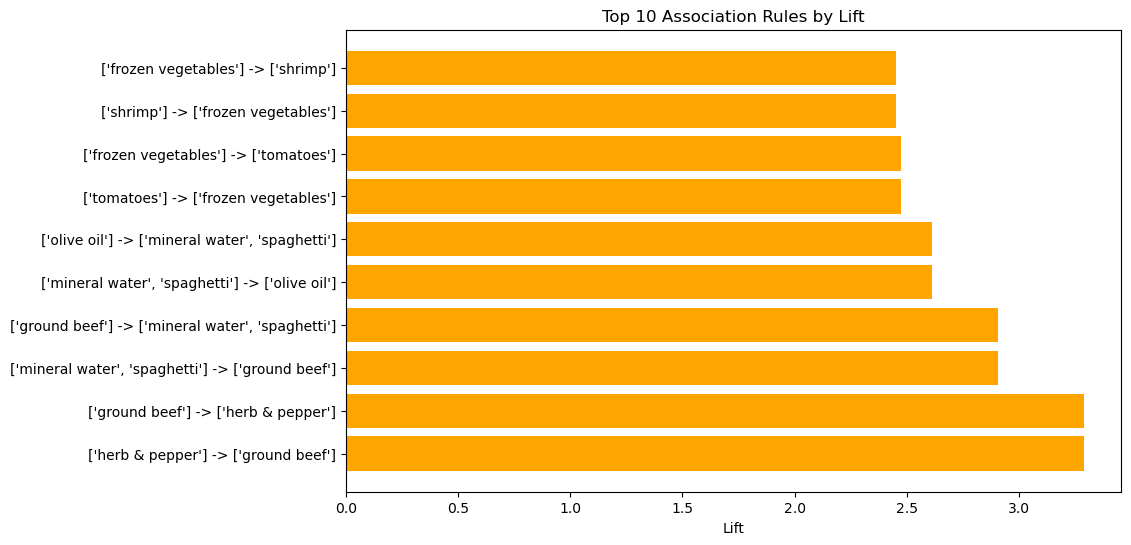

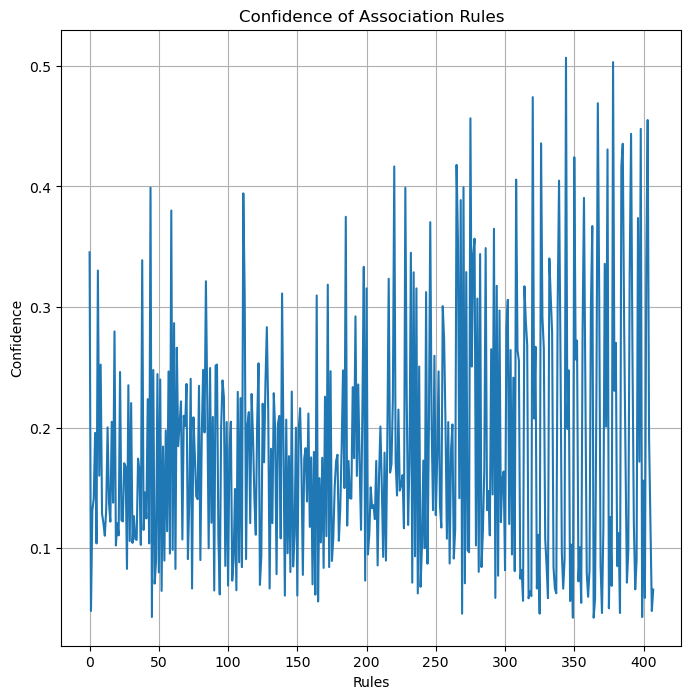

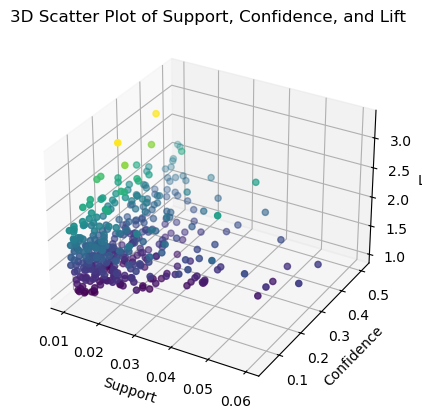

In [5]:
# Generate association rules with a minimum lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few rules
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Visualize the top 10 rules by lift
top_rules = rules.nlargest(10, 'lift')
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_rules['lift'], color='orange')
plt.yticks(range(10), [f"{list(a)} -> {list(c)}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.show()

# Plot confidence of all rules
rules['confidence'].plot(figsize=(8, 8), grid=True)
plt.ylabel('Confidence')
plt.xlabel('Rules')
plt.title('Confidence of Association Rules')
plt.show()

# Create a 3D scatter plot for support, confidence, and lift
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

# Extracting the support, confidence, and lift from the rules dataframe
support = rules['support']
confidence = rules['confidence']
lift = rules['lift']

# Create the 3D scatter plot
ax1.scatter(support, confidence, lift, c=lift, cmap='viridis', marker='o')

# Set labels for axes
ax1.set_xlabel("Support")
ax1.set_ylabel("Confidence")
ax1.set_zlabel("Lift")

plt.title('3D Scatter Plot of Support, Confidence, and Lift')
plt.show()


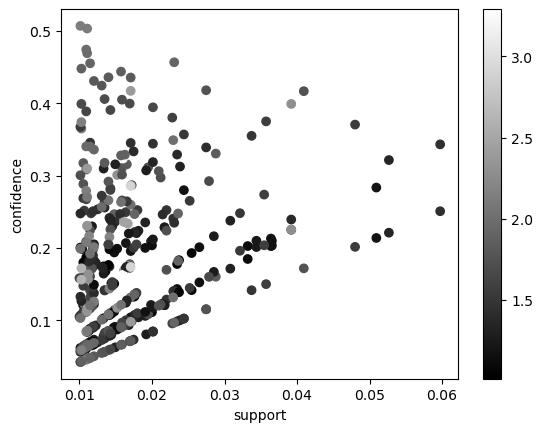

In [6]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")
plt.show()